In [1]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# reading list of drugs
ABs = pd.read_excel('cytof_antibodies.xls',index_col=0)
ABs

,Target,Clone,Clone Reactivity,Clone Applications,Manufacturer,Lot,Description and Clone Validation (Manufacturer),Staining Concentration [µg/ml],User Clone Validation (Py2T by Mass Cytometry)
Isotope,,,,,,,,,
La139,Purified Mouse Anti-CREB (pS133) / ATF-1 (pS63),J151-21,"Human, Mouse, Rat (predicted)","WB, FC",BD,558359,https://www.bdbiosciences.com/us/reagents/rese...,2.000,"Py2T, MEK1/2 signaling perturbation"
Pr141,pStat5 (pTyr694),47,Mouse; Human,"WB, FC",BD,2150654,https://www.bdbiosciences.com/us/applications/...,4.900,"30 min vanadate treatment, 125µM vs 30 min Un..."
Nd142,pSHP2 (pTyr580),D66F10,Human; Mouse; Rat,"WB, IP, FC",CST,2,https://www.cellsignal.com/products/primary-an...,4.000,18 h TPA vs Untreated
Nd143,pFAK (pTyr397),poly7,Human; Mouse,WB,CST,5,https://www.cellsignal.com/products/primary-an...,2.500,5 Days 4 ng/mL TGFb vs 5 Days Untreated
Nd144,MEK1/2 (pSer221),166F8,Human; Mouse,"WB, IHC, FC",CST,13,https://www.cellsignal.com/products/primary-an...,4.000,"30 min 4 ng/mL TGFb + Dabrafenib, AZ628 (bRaf,..."
Nd145,Twist,poly ABD29,Mouse; Human,"IH(P), ICC",Millipore,ABD29,http://www.merckmillipore.com/NL/en/product/An...,4.000,3 Days 4 ng/mL TGFb vs 3 Days Untreated
Nd147,c-myc,D84C12,Human; Mouse,"WB, IF, FC",CST,7,https://www.cellsignal.com/products/primary-an...,6.000,18 h TPA vs Untreated
Nd148,Snail,ab180714,Human; Mouse,"IHC-Fr, WB, ICC/IF, IHC-P",Abcam,AF3639,https://www.abcam.com/snail-slug-antibody-ab18...,5.000,3 Days 4 ng/mL TGFb vs 3 Days Untreated
Nd149,Nanog,D2A3,Mouse,"WB, IP, FC, IF, ChiP",BD,2,https://www.cellsignal.com/products/primary-an...,3.000,Not validated by user


In [7]:
drugs = pd.read_excel('cytof_drugs.xls',index_col=0)
drugs

,Cas Number,Reported Target,Catalog Number,Plate / Well
Compound in DMSO,,,,
Axitinib,319460-85-0,"VEGFR, PDGFR, c-Kit",S1005,A / B2
Dovitinib (TKI-258),"405169-16-6, 804551-71-1",FLT3,S1018,A / B3
Lapatinib Ditosylate (Tykerb),"388082-77-7, 231277-92-2 (free base), 1187538-...","EGFR, HER2",S1028,A / B4
Sorafenib (Nexavar),"475207-59-1, 284461-73-0 (free base)","VEGFR, PDGFR, Raf",S1040,A / B5
BMS-599626 (AC480),"714971-09-2, 873837-23-1 (HCl), 873837-22-0 (H2O)","EGFR, HER2",S1056,A / B6
SB 203580,"152121-47-6, 224047-03-4, 869185-85-3 (HCl)",p38 MAPK,S1076,A / B7
KU-55933,587871-26-9,ATM,S1092,A / B8
LY294002,"154447-36-6, 934389-88-5 (HCl)",PI3K,S1105,A / B9
JNJ-38877605,"943540-75-8, 1093204-17-1 (X methanesulfonate)...",c-Met,S1114,A / B10


In [14]:
# reading dataset A
annot_A = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/experiment_83976_annotations.tsv',index_col=0,sep='\t')

controls_MES_A = annot_A.filter(regex='Untreated_E\d+_Singlets',axis=0).index
controls_EPY_A = annot_A.filter(regex='Untreated_E\d+_Singlets',axis=0).index
controls_EPY_A

Index(['A1_5Days_Untreated_E2_Singlets_E2.fcs.fcs',
       'A1_5Days_Untreated_E3_Singlets_E3.fcs.fcs',
       'A1_5Days_Untreated_E4_Singlets_E4.fcs.fcs',
       'A1_5Days_Untreated_E5_Singlets_E5.fcs.fcs',
       'A1_5Days_Untreated_E6_Singlets_E6.fcs.fcs'],
      dtype='object', name='FCS Filename')

In [4]:
# using FlowCal to read files
import FlowCal
singlet_E7 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/A1_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
singlet_E8 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/A1_5Days_TGFb_E8_Singlets_E8.fcs.fcs')
untreat_E2 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/A1_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
untreat_E3 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/A1_5Days_Untreated_E3_Singlets_E3.fcs.fcs')
print(singlet_E7.shape)
print(singlet_E7.channels)

(3797, 55)
('Time', 'Cell_length', '(Pd102)Di', '(Pd104)Di', '(Pd105)Di', '(Pd106)Di', '(Pd108)Di', '(Pd110)Di', '(In113)Di', '(In115)Di', '(I127)Di', '(La139)Di', '(Ce140)Di', '(Pr141)Di', '(Nd142)Di', '(Nd143)Di', '(Nd144)Di', '(Nd145)Di', '(Nd146)Di', '(Sm147)Di', '(Nd148)Di', '(Sm149)Di', '(Nd150)Di', '(Eu151)Di', '(Sm152)Di', '(Eu153)Di', '(Sm154)Di', '(Gd155)Di', '(Gd156)Di', '(Gd158)Di', '(Tb159)Di', '(Gd160)Di', '(Dy161)Di', '(Dy162)Di', '(Dy163)Di', '(Dy164)Di', '(Ho165)Di', '(Er166)Di', '(Er167)Di', '(Er168)Di', '(Tm169)Di', '(Er170)Di', '(Yb171)Di', '(Yb172)Di', '(Yb173)Di', '(Yb174)Di', '(Lu175)Di', '(Yb176)Di', '(Ir191)Di', '(Ir193)Di', '(Pt194)Di', '(Pt195)Di', 'FileNum', 'beadDist', 'barcode')


<IPython.core.display.Javascript object>


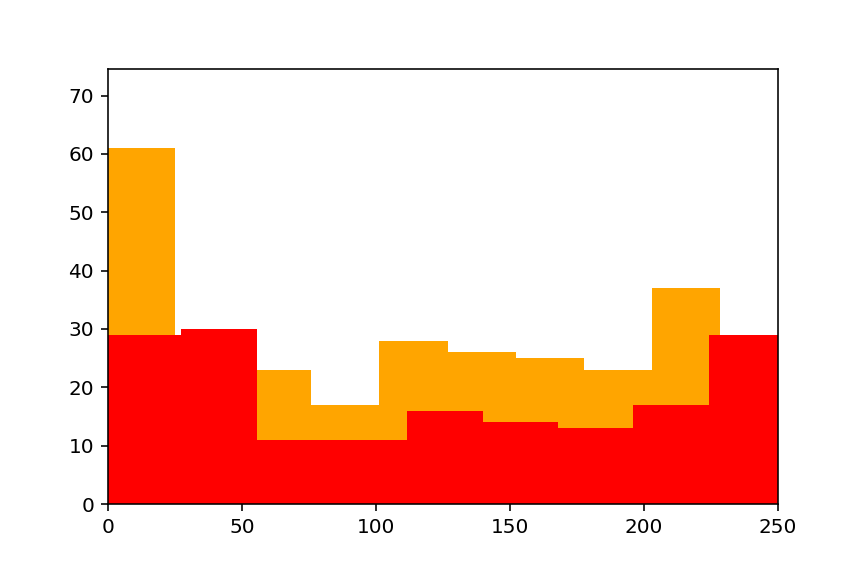

(0.0, 250.0)

In [5]:
# trying to plot something from FlowCal
#plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
#plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
plt.hist(untreat_E3[:, '(Yb174)Di'], bins=100,color='orange')
plt.hist(untreat_E2[:, '(Yb174)Di'], bins=100,color='red')

plt.xlim(0,250)

#plt.show()

<IPython.core.display.Javascript object>


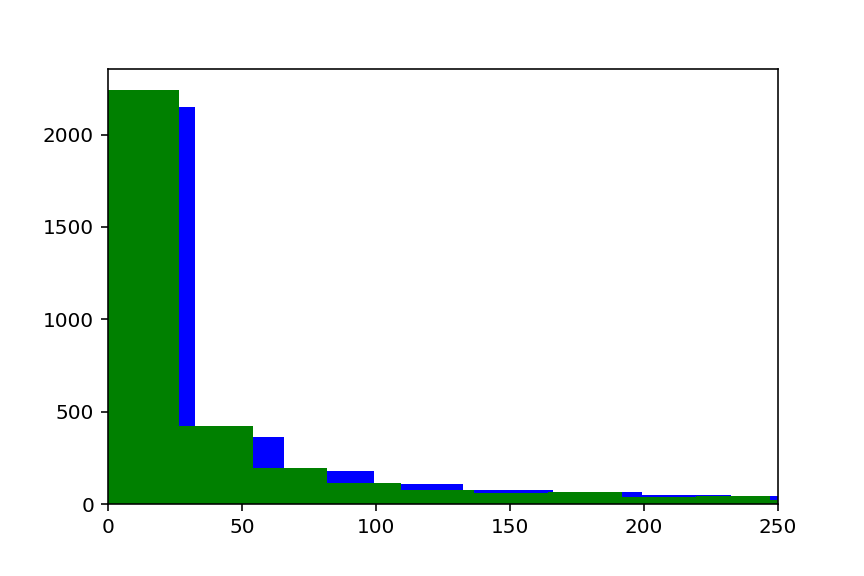

(0.0, 250.0)

In [6]:
# trying to plot something from FlowCal
plt.hist(singlet_E7[:, '(Yb174)Di'], bins=100,color='blue')
plt.hist(singlet_E8[:, '(Yb174)Di'], bins=100,color='green')
#plt.hist(untreat_E3[:, '(Yb174)Di'], bins=100,color='orange')
#plt.hist(untreat_E2[:, '(Yb174)Di'], bins=100,color='red')

plt.xlim(0,250)

#plt.show()

<IPython.core.display.Javascript object>


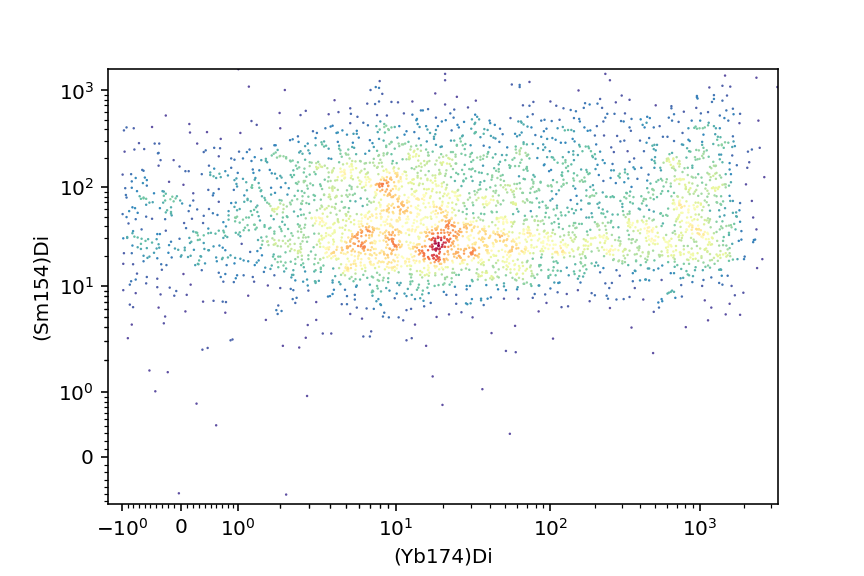

In [57]:
FlowCal.plot.density2d(singlet_E7, channels=['(Yb174)Di', '(Sm154)Di'], mode='scatter')

In [59]:
print('A1_5Days_TGFb_E7_Singlets_E7, mean E-cadh = ' + str(statistics.mean(singlet_E7[:, '(Yb174)Di'])))

print('A1_5Days_Untreated_E2_Singlets_E2, mean E_cadh = ' + str(statistics.mean(untreat_E3[:, '(Yb174)Di'])))


A1_5Days_TGFb_E7_Singlets_E7, mean E-cadh = 204.22585
A1_5Days_Untreated_E2_Singlets_E2, mean E_cadh = 752.37604
